<a href="https://colab.research.google.com/github/hoashalarajh/Matlab-Based-Image-Processing/blob/main/Machine_learning_Model_Audio_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import joblib

In [2]:
# Mount the google dirve
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data_path = '/content/drive/MyDrive/emotions5/audio_features/'
dir_list = os.listdir(data_path)
dir_list.sort()

print (f"The total number of files is {len(dir_list)}")

The total number of files is 8


In [4]:
feature_anger = pd.read_csv("/content/drive/MyDrive/emotions5/audio_features/My_fature_table_anger.csv")
feature_happy = pd.read_csv("/content/drive/MyDrive/emotions5/audio_features/My_fature_table_happy.csv")
feature_sad = pd.read_csv("/content/drive/MyDrive/emotions5/audio_features/My_fature_table_sad.csv")
feature_fear = pd.read_csv("/content/drive/MyDrive/emotions5/audio_features/My_fature_table_fear.csv")
feature_neutral = pd.read_csv("/content/drive/MyDrive/emotions5/audio_features/My_fature_table_neutral.csv")
feature_surprise = pd.read_csv("/content/drive/MyDrive/emotions5/audio_features/My_fature_table_surprise.csv")

In [5]:
# getting a final feature table
final_feature_table = pd.concat([feature_anger, feature_happy, feature_sad, feature_fear, feature_neutral,  feature_surprise], axis = 0)

In [6]:
final_feature_table

,amplitude_envelope,rms_energy,zero_cross_rate,fundamental_frequency,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mean_amp_env,std_amp_env,emotion
0,0.043497,0.015402,0.007639,0.386894,-353.764148,131.447815,14.655576,10.321879,-3.744143,-4.836601,-7.355489,-8.425206,-10.102865,-10.102865,-11.221965,-11.302649,-11.365566,0.001024,0.023365,anger
1,0.043497,0.023387,0.015278,0.046701,-523.215937,202.155133,71.665954,8.323708,-5.890504,-14.933899,-19.861132,-17.141890,-4.843563,-4.843563,2.429597,-25.304505,-40.723777,-0.000326,0.023457,anger
2,0.045977,0.023459,0.015278,0.042754,-527.969459,198.245737,73.351795,15.340493,1.857628,-11.334859,-16.863546,-15.571520,-11.473621,-11.473621,-4.241484,-28.848267,-37.999197,-0.000882,0.024393,anger
3,0.046101,0.024409,0.013889,0.039642,-516.086484,198.007018,57.005732,9.382980,3.253131,-12.897009,-16.490988,-16.257174,-19.929985,-19.929985,-1.135076,-19.160977,-32.887618,0.001156,0.026456,anger
4,0.051560,0.026481,0.013194,0.037738,-532.382726,192.398437,68.860130,14.697445,5.338385,-8.446634,-14.885569,-10.332494,-4.989532,-4.989532,5.165431,-17.307719,-31.463145,0.000718,0.027971,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,0.007557,0.003186,0.019444,0.468722,-670.710235,239.436683,23.687856,26.115311,15.837965,-0.983729,-2.784533,-14.485274,-15.142151,-15.142151,18.640299,6.203172,-7.918283,0.000123,0.002961,surprise
2387,0.006247,0.002964,0.016667,0.000000,-671.579270,247.251779,41.564854,43.901241,20.374572,-10.522573,-9.571246,-16.209996,-8.109431,-8.109431,20.323973,-1.572100,-12.785939,0.000092,0.002555,surprise
2388,0.006247,0.002557,0.014583,0.925695,-684.194228,231.344635,26.683651,31.608150,17.963766,-7.015165,-3.542529,-3.928370,4.882169,4.882169,17.095587,3.591197,-11.590350,-0.000112,0.002586,surprise
2389,0.004824,0.002589,0.015972,0.036845,-670.442655,236.850276,33.496793,35.311105,10.670101,-8.263827,-15.363866,-10.279825,2.667539,2.667539,18.415334,2.311036,-13.658322,-0.000024,0.002152,surprise


In [7]:
# visualizing feature table
final_feature_table.head(10)

,amplitude_envelope,rms_energy,zero_cross_rate,fundamental_frequency,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mean_amp_env,std_amp_env,emotion
0,0.043497,0.015402,0.007639,0.386894,-353.764148,131.447815,14.655576,10.321879,-3.744143,-4.836601,-7.355489,-8.425206,-10.102865,-10.102865,-11.221965,-11.302649,-11.365566,0.001024,0.023365,anger
1,0.043497,0.023387,0.015278,0.046701,-523.215937,202.155133,71.665954,8.323708,-5.890504,-14.933899,-19.861132,-17.141890,-4.843563,-4.843563,2.429597,-25.304505,-40.723777,-0.000326,0.023457,anger
2,0.045977,0.023459,0.015278,0.042754,-527.969459,198.245737,73.351795,15.340493,1.857628,-11.334859,-16.863546,-15.571520,-11.473621,-11.473621,-4.241484,-28.848267,-37.999197,-0.000882,0.024393,anger
3,0.046101,0.024409,0.013889,0.039642,-516.086484,198.007018,57.005732,9.382980,3.253131,-12.897009,-16.490988,-16.257174,-19.929985,-19.929985,-1.135076,-19.160977,-32.887618,0.001156,0.026456,anger
4,0.051560,0.026481,0.013194,0.037738,-532.382726,192.398437,68.860130,14.697445,5.338385,-8.446634,-14.885569,-10.332494,-4.989532,-4.989532,5.165431,-17.307719,-31.463145,0.000718,0.027971,anger
5,0.086327,0.027980,0.013194,0.037329,-524.801965,195.273764,68.726192,17.120437,-4.842269,-23.027624,-15.944977,-8.802024,-12.027971,-12.027971,1.268682,-16.637941,-26.945249,-0.001634,0.040028,anger
6,0.115245,0.040061,0.013194,0.037902,-502.982181,197.000086,58.051505,26.210208,-1.399537,-15.733914,-2.682683,-3.262735,-7.028219,-7.028219,-11.310648,-16.856593,-34.215015,-0.001267,0.053305,anger
7,0.115245,0.053320,0.017361,0.038377,-453.104590,217.934521,44.942511,34.879192,-6.882855,-30.745361,-6.523309,-10.457334,-12.971785,-12.971785,-7.761780,-1.469325,-29.405770,0.001183,0.052457,anger
8,0.114153,0.052470,0.025000,0.041895,-445.843311,213.686156,20.131440,15.679920,-16.280668,-50.130321,-26.591920,-19.830499,-15.431284,-15.431284,-13.546306,1.440594,-1.595794,0.000925,0.036714,anger
9,0.045810,0.036726,0.029861,0.118187,-489.249363,185.046746,13.991466,-4.844249,-24.982756,-43.264835,-19.632532,-16.031246,-14.197344,-14.197344,0.148065,5.291001,7.780097,-0.000002,0.022824,anger


In [8]:
# describing feature table
final_feature_table.describe()

,amplitude_envelope,rms_energy,zero_cross_rate,fundamental_frequency,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mean_amp_env,std_amp_env
count,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000,37886.000000
mean,0.069594,0.031254,0.019004,0.075708,-506.688769,179.680109,54.608581,21.622718,15.880528,-1.042503,-13.487490,-13.684642,-3.011446,-3.011446,6.805875,-5.322322,-16.383036,-0.000024,0.031073
std,0.078757,0.035519,0.013823,0.152760,80.452283,40.050458,36.521681,28.117253,20.180937,19.496271,16.666892,14.430377,12.879935,12.879935,10.472131,10.697384,10.708052,0.006233,0.035154
min,-0.025433,0.000018,0.000000,0.000000,-798.133954,0.000000,-102.750671,-93.540419,-62.571806,-87.045255,-85.171649,-69.792749,-69.047173,-69.047173,-38.685697,-50.421765,-59.787976,-0.110374,0.000026
25%,0.021244,0.009253,0.011111,0.005689,-564.931278,152.221057,30.862197,5.133714,2.965418,-12.792023,-23.875479,-22.951902,-10.939784,-10.939784,-0.077188,-12.201285,-23.443778,-0.000468,0.009234
50%,0.043545,0.019281,0.015972,0.022340,-510.255621,181.430102,60.370433,25.044320,16.886009,0.922169,-12.358283,-13.499190,-2.450114,-2.450114,6.782331,-5.354189,-16.399350,-0.000045,0.019227
75%,0.088326,0.039458,0.023611,0.068890,-449.524817,209.349541,82.070110,41.195760,29.109653,12.122717,-2.663565,-4.598831,5.539648,5.539648,13.660796,1.555157,-9.507685,0.000379,0.039286
max,0.787940,0.347764,0.254861,1.000000,-154.780427,301.366263,142.302260,128.544296,101.602920,63.577770,48.241902,47.763101,44.846295,44.846295,88.109551,65.611507,41.799182,0.202775,0.347762


In [9]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# seperating features and targets from pandas dataframe
X = (final_feature_table.drop(columns = ['emotion']))
X = X[:].values
y = np.array(final_feature_table.loc[:, "emotion"])

In [11]:
# fitting data to scaler
scaler.fit(X)

StandardScaler()

In [12]:
# transforming data
X_train = scaler.transform(X)

In [13]:
print (f"Shape of X_train is : {X.shape}")
print (f"Shape of y_train is : {y.shape}")

Shape of X_train is : (37886, 19)
Shape of y_train is : (37886,)


In [14]:
# finding categories in target set
class_labels = np.unique(y)
print (class_labels)

['anger' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [15]:
# train, teast and split data
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [16]:
# getting shapes of traing and testing sets
print(f"Shape of X_train is : {X_train.shape}")
print(f"Shape of y_train is : {y_train.shape}")
print(f"Shape of X_test is : {X_test.shape}")
print(f"Shape of y_test is : {y_test.shape}")

Shape of X_train is : (26520, 19)
Shape of y_train is : (26520,)
Shape of X_test is : (11366, 19)
Shape of y_test is : (11366,)


## Random Forest Classifier

In [17]:
# using Random Forest Classifier to Classify emotions
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(max_depth = 60, n_estimators = 500)
classifier1.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, n_estimators=500)

In [18]:
# performing predictions on the test dataset
y_pred_rf = classifier1.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_rf))

ACCURACY OF THE MODEL:  0.8181418265000879


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
y_pred = classifier1.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[3398    8  128   79   97    2]
 [  73  877   16   11    9    5]
 [ 365    4 1403   80   54    6]
 [ 152    6   82 1590   56    1]
 [ 329    3  145  104 1567    3]
 [ 137    5   63   13   31  464]]


<Figure size 7200x7200 with 0 Axes>

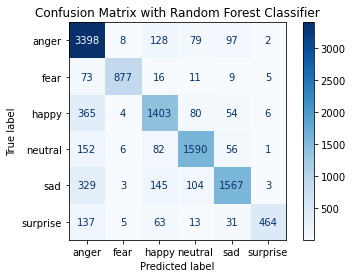

In [20]:
# visualizing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# calculating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

target_names = class_labels
plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix with Random Forest Classifier")
plt.show()

<Figure size 7200x7200 with 0 Axes>

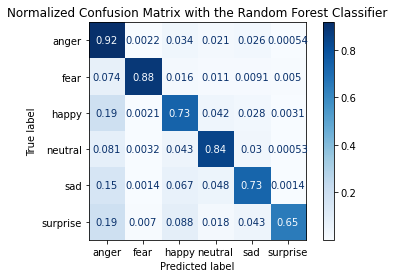

In [21]:
# getting cormalized confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

target_names = class_labels
plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix with the Random Forest Classifier")
plt.show()

In [22]:
# calculating cohen's kappa value
from sklearn.metrics import cohen_kappa_score
score_RF = cohen_kappa_score(y_pred, y_test, labels = class_labels)
print(f"Cohen Kappa Score for Random Forest Classifer is : {score_RF}")

Cohen Kappa Score for Random Forest Classifer is : 0.7661375654528764


In [23]:
# classification report ====> Looking for F1 score - Looking at Imbalanced Dataset
from sklearn.metrics import classification_report

print('Classification Report for Random Forest Classifier')
target_names = class_labels
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

       anger       0.76      0.92      0.83      3712
        fear       0.97      0.88      0.93       991
       happy       0.76      0.73      0.75      1912
     neutral       0.85      0.84      0.84      1887
         sad       0.86      0.73      0.79      2151
    surprise       0.96      0.65      0.78       713

    accuracy                           0.82     11366
   macro avg       0.86      0.79      0.82     11366
weighted avg       0.83      0.82      0.82     11366



## K - Nearest Neighbour Classifier

In [24]:
# implementing knn calssifier algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', metric = 'minkowski' )

In [25]:
classifier3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [26]:
# performing predictions on the test dataset
y_pred_knn = classifier3.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_knn))

ACCURACY OF THE MODEL:  0.8500791835298258


In [27]:
'''
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [3,4,5,7,8,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

# fit the model on our train set
g_res = gs.fit(X_train, y_train)
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\ngrid_params = { 'n_neighbors' : [3,4,5,7,8,9,11,13,15],\n               'weights' : ['uniform','distance'],\n               'metric' : ['minkowski','euclidean','manhattan']}\n\ngs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)\n\n# fit the model on our train set\ng_res = gs.fit(X_train, y_train)\n"

In [28]:
# find the best score
#g_res.best_score_

In [29]:
# get the hyperparameters with the best score
#g_res.best_params_

<Figure size 7200x7200 with 0 Axes>

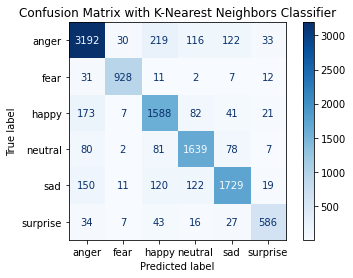

In [30]:
# visualizing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# calculating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_knn)

target_names = class_labels
plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix with K-Nearest Neighbors Classifier")
plt.show()

<Figure size 7200x7200 with 0 Axes>

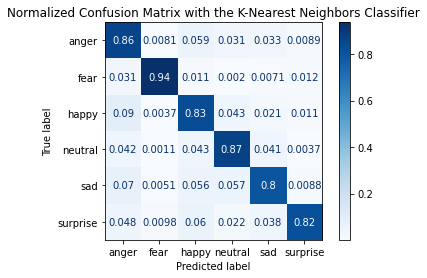

In [31]:
# getting cormalized confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_knn)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

target_names = class_labels
plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix with the K-Nearest Neighbors Classifier")
plt.show()

In [32]:
# calculating cohen's kappa value
from sklearn.metrics import cohen_kappa_score
score_kNN = cohen_kappa_score(y_pred_knn, y_test, labels = class_labels)
print(f"Cohen Kappa Score for kNN Classifer is : {score_kNN}")

Cohen Kappa Score for kNN Classifer is : 0.81041227431494


In [33]:
# classification report ====> Looking for F1 score - Looking at Imbalanced Dataset
from sklearn.metrics import classification_report

print('Classification Report for kNN Classifier')
target_names = class_labels
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Classification Report for kNN Classifier
              precision    recall  f1-score   support

       anger       0.87      0.86      0.87      3712
        fear       0.94      0.94      0.94       991
       happy       0.77      0.83      0.80      1912
     neutral       0.83      0.87      0.85      1887
         sad       0.86      0.80      0.83      2151
    surprise       0.86      0.82      0.84       713

    accuracy                           0.85     11366
   macro avg       0.86      0.85      0.85     11366
weighted avg       0.85      0.85      0.85     11366



## Voting Classifier

In [34]:
# building a voting classifier
from sklearn.ensemble import VotingClassifier
classifier5 = VotingClassifier(
    estimators = [('RandomForest', classifier1), ('K-NN', classifier3)],
    voting = 'soft'
)

In [35]:
# fitting data to voting classifer
classifier5.fit(X_train, y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(max_depth=60,
                                                     n_estimators=500)),
                             ('K-NN',
                              KNeighborsClassifier(n_neighbors=4,
                                                   weights='distance'))],
                 voting='soft')

In [36]:
# performing predictions on the test dataset
y_pred_voting = classifier5.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_voting))# performing predictions on the test dataset
y_pred_voting = classifier5.predict(X_test)

ACCURACY OF THE MODEL:  0.8627485483019532


<Figure size 7200x7200 with 0 Axes>

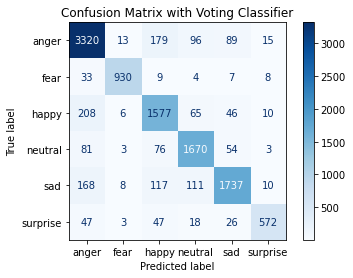

In [37]:
# visualizing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# calculating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_voting)

target_names = class_labels
plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix with Voting Classifier")
plt.show()

<Figure size 7200x7200 with 0 Axes>

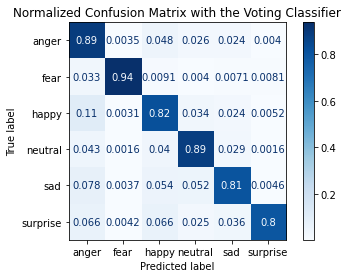

In [38]:
# getting cormalized confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_voting)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

target_names = class_labels
plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix with the Voting Classifier")
plt.show()

In [39]:
# calculating cohen's kappa value
from sklearn.metrics import cohen_kappa_score
score_Voting = cohen_kappa_score(y_pred_voting, y_test, labels = class_labels)
print(f"Cohen Kappa Score for Voting Classifer is : {score_Voting}")

Cohen Kappa Score for Voting Classifer is : 0.8256891874398252


In [40]:
# classification report ====> Looking for F1 score - Looking at Imbalanced Dataset
from sklearn.metrics import classification_report

print('Classification Report for Voting Classifier')
target_names = class_labels
print(classification_report(y_test, y_pred_voting, target_names=target_names))

Classification Report for Voting Classifier
              precision    recall  f1-score   support

       anger       0.86      0.89      0.88      3712
        fear       0.97      0.94      0.95       991
       happy       0.79      0.82      0.81      1912
     neutral       0.85      0.89      0.87      1887
         sad       0.89      0.81      0.85      2151
    surprise       0.93      0.80      0.86       713

    accuracy                           0.86     11366
   macro avg       0.88      0.86      0.87     11366
weighted avg       0.86      0.86      0.86     11366



In [41]:
# calculating f1 score of the voting classifier
# F1 score is a good metric to evaluate when there are class imbalances in the data set
from sklearn.metrics import f1_score
f1_score_voting = f1_score(y_test, y_pred_voting, labels = class_labels, average = 'weighted')
print (f"The F1 Score of the Voting Classifier is : {f1_score_voting}")

The F1 Score of the Voting Classifier is : 0.8628244278482251


In [43]:
# predict probability of emotion class using the voting classifer
example_num = 25
example1 = X_test[example_num].reshape(1,-1)
pred_prob = classifier5.predict_proba(example1)
index1 = np.argmax(pred_prob)
print (f"Example of feautres : {example1}")
print (f"The predicted probabiities for emotion classes are : {pred_prob}")
print (f"The actual class of the example is : {y_test[example_num]}")
print (f"The predicted class of this example is : {class_labels[index1]}")
print (f"The available emotion classes are : {class_labels}")

Example of feautres : [[ 2.91225549e-01  1.78115428e-01  1.45833330e-02  3.02274350e-02
  -3.52110026e+02  2.04093541e+02  4.94944075e+01  1.11570058e+01
   1.95991556e+01  1.90549064e+01 -4.74506245e-01 -3.30343242e+01
  -2.31655188e+01 -2.31655188e+01 -3.49585953e+00 -1.94763560e+01
  -7.26470316e+00 -2.33945800e-03  1.47845883e-01]]
The predicted probabiities for emotion classes are : [[0.51495162 0.016      0.1        0.012      0.35104838 0.006     ]]
The actual class of the example is : anger
The predicted class of this example is : anger
The available emotion classes are : ['anger' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [44]:
import pickle
# saving trained RFModel
pickle.dump(classifier1, open("/content/drive/MyDrive/emotions5/audio_features/RandomForestModel#03.sav", 'wb'))

#saving trained kNN Model
pickle.dump(classifier3, open("/content/drive/MyDrive/emotions5/audio_features/KNNModel#03.sav", 'wb'))

# saving voting classifier
pickle.dump(classifier5, open("/content/drive/MyDrive/emotions5/audio_features/VotingClassifierModel#03.sav", 'wb'))